<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time series aggregation


---

### Learning Objectives

- "Rolling" statistics through time, such as the rolling mean.
- Exponentially weighted statistics.
- Differencing and Shifting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id="load-the-unemployment-data"></a>
<a id="load-the-unemployment-data"></a>
## Load the Unemployment Data
---
This is historical monthly data regarding unemployment rates in the United States, from [the Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/series/UNRATE).  First, perform any necessary cleaning.

In [2]:
df = pd.read_csv('./datasets/unemployment.csv')


In [3]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Month                                   295 non-null    object
 1   Seasonally Adjusted Unemployment Rates  295 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


In [4]:
# view the first few lines of data
df.head(3)

,Month,Seasonally Adjusted Unemployment Rates
0,01/01/1999,4.30%
1,01/02/1999,4.40%
2,01/03/1999,4.20%


### Rename the columns

Shorter names than the original ones could be good.

In [5]:
df.columns=['date', 'unemployment_rate']
df.head()

,date,unemployment_rate
0,01/01/1999,4.30%
1,01/02/1999,4.40%
2,01/03/1999,4.20%
3,01/04/1999,4.30%
4,01/05/1999,4.20%


### Clean the unemployment rate column

Remove the percentage sign and transform to float by applying the lambda function:

`lambda x: float(str(x).replace('%','')`

In [6]:
# Apply the lambda function to the unemployment rate column
df['unemployment_rate'] = df['unemployment_rate'].apply(lambda x: float(str(x).replace('%','')))
df.head()

,date,unemployment_rate
0,01/01/1999,4.3
1,01/02/1999,4.4
2,01/03/1999,4.2
3,01/04/1999,4.3
4,01/05/1999,4.2


In [7]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               295 non-null    object 
 1   unemployment_rate  295 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [10]:
# Drop any nulls if there are
df.dropna(inplace=True)

In [11]:
# Check the first five lines
df.head(5)

,date,unemployment_rate
0,01/01/1999,4.3
1,01/02/1999,4.4
2,01/03/1999,4.2
3,01/04/1999,4.3
4,01/05/1999,4.2


## Create a Datetime Index
---

This is monthly data and has been stored as a string in day/month/year format. 

- We need to first transform the column with the dates as `str` objects to datetime. Specify the format was `'%d/%m/%Y'`
- Then use `.dt.to_period('M')` to represent the string as a datetime time period object, instead of a timestamp.
    - a Timestamp object represents a single point in time
    - a Period object represents a time period (a month, a year, a week, etc)
- Finally, set this datetime column as the index.


In [12]:
# Convert the date as a monthly datetime period using pd.to_datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.to_period('M')
df['date'].head()

0    1999-01
1    1999-02
2    1999-03
3    1999-04
4    1999-05
Name: date, dtype: period[M]

In [13]:
# For time series, set the date as the index.
df.set_index('date', inplace=True, drop=True)
df.head()

,unemployment_rate
date,
1999-01,4.3
1999-02,4.4
1999-03,4.2
1999-04,4.3
1999-05,4.2


In [14]:
# Check the info of the dataframe  now. What is the index?
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 295 entries, 1999-01 to 2023-07
Freq: M
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unemployment_rate  295 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


## Visually Examine the Unemployment Rate
---

Plot the unemployment rate.

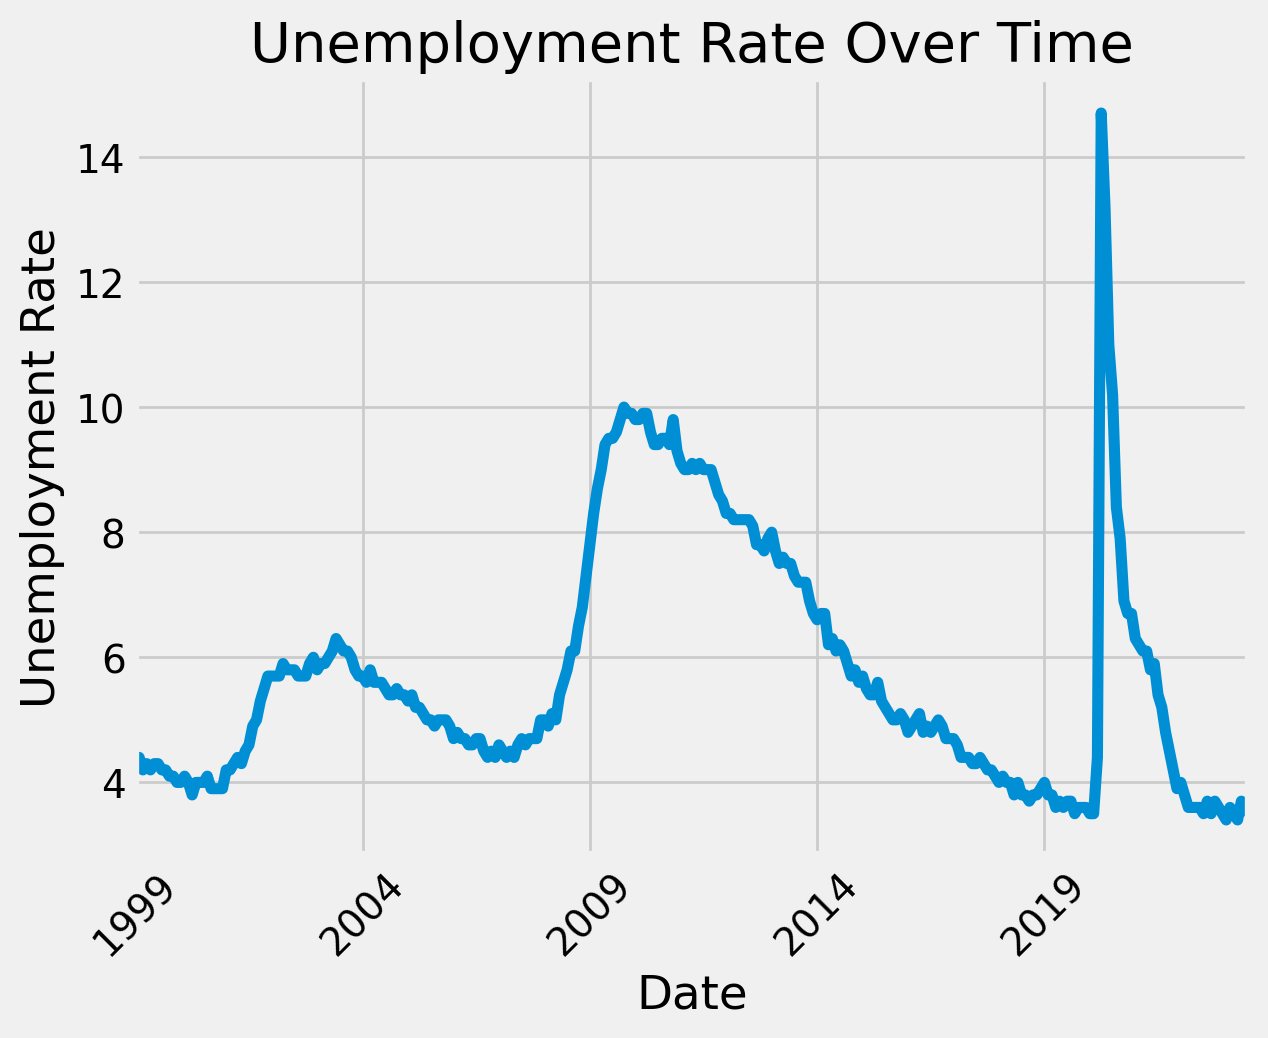

In [15]:
df['unemployment_rate'].plot()
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over Time')

plt.show()


### Resample the time series to report weekly or annual means.

Applying `.resample(freq)` to a pandas timeseries with a specified frequency, for example:
- `'W'` : weekly 
- `'A'` : year end
- `'M'` : month end
- `'MS'`: month start 
- `'H'` : hour
- `'T'` or `'min'` : minute

followed by an aggregation function like `.mean()`, creates aggregates across the indicated frequency (similar to `group by`).

For more codes refer to the [Pandas Timeseries documentation](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) (under "Frequency String")

#### Resample annually using the mean for aggregation. Plot and compare to the original time series.

In [16]:
yearly = df['unemployment_rate'].resample('A').mean()
yearly.head()

date
1999    4.216667
2000    3.966667
2001    4.741667
2002    5.783333
2003    5.991667
Freq: A-DEC, Name: unemployment_rate, dtype: float64

In [20]:
# 1999 mean
print(df.iloc[0:12].mean())
print(df.loc['1999-01':'2000-12'].mean())

unemployment_rate    4.216667
dtype: float64
unemployment_rate    4.091667
dtype: float64


In [21]:
# Try to add a quarterly 
quarterly = df['unemployment_rate'].resample('Q').mean()
quarterly.head()

date
1999Q1    4.300000
1999Q2    4.266667
1999Q3    4.233333
1999Q4    4.066667
2000Q1    4.033333
Freq: Q-DEC, Name: unemployment_rate, dtype: float64

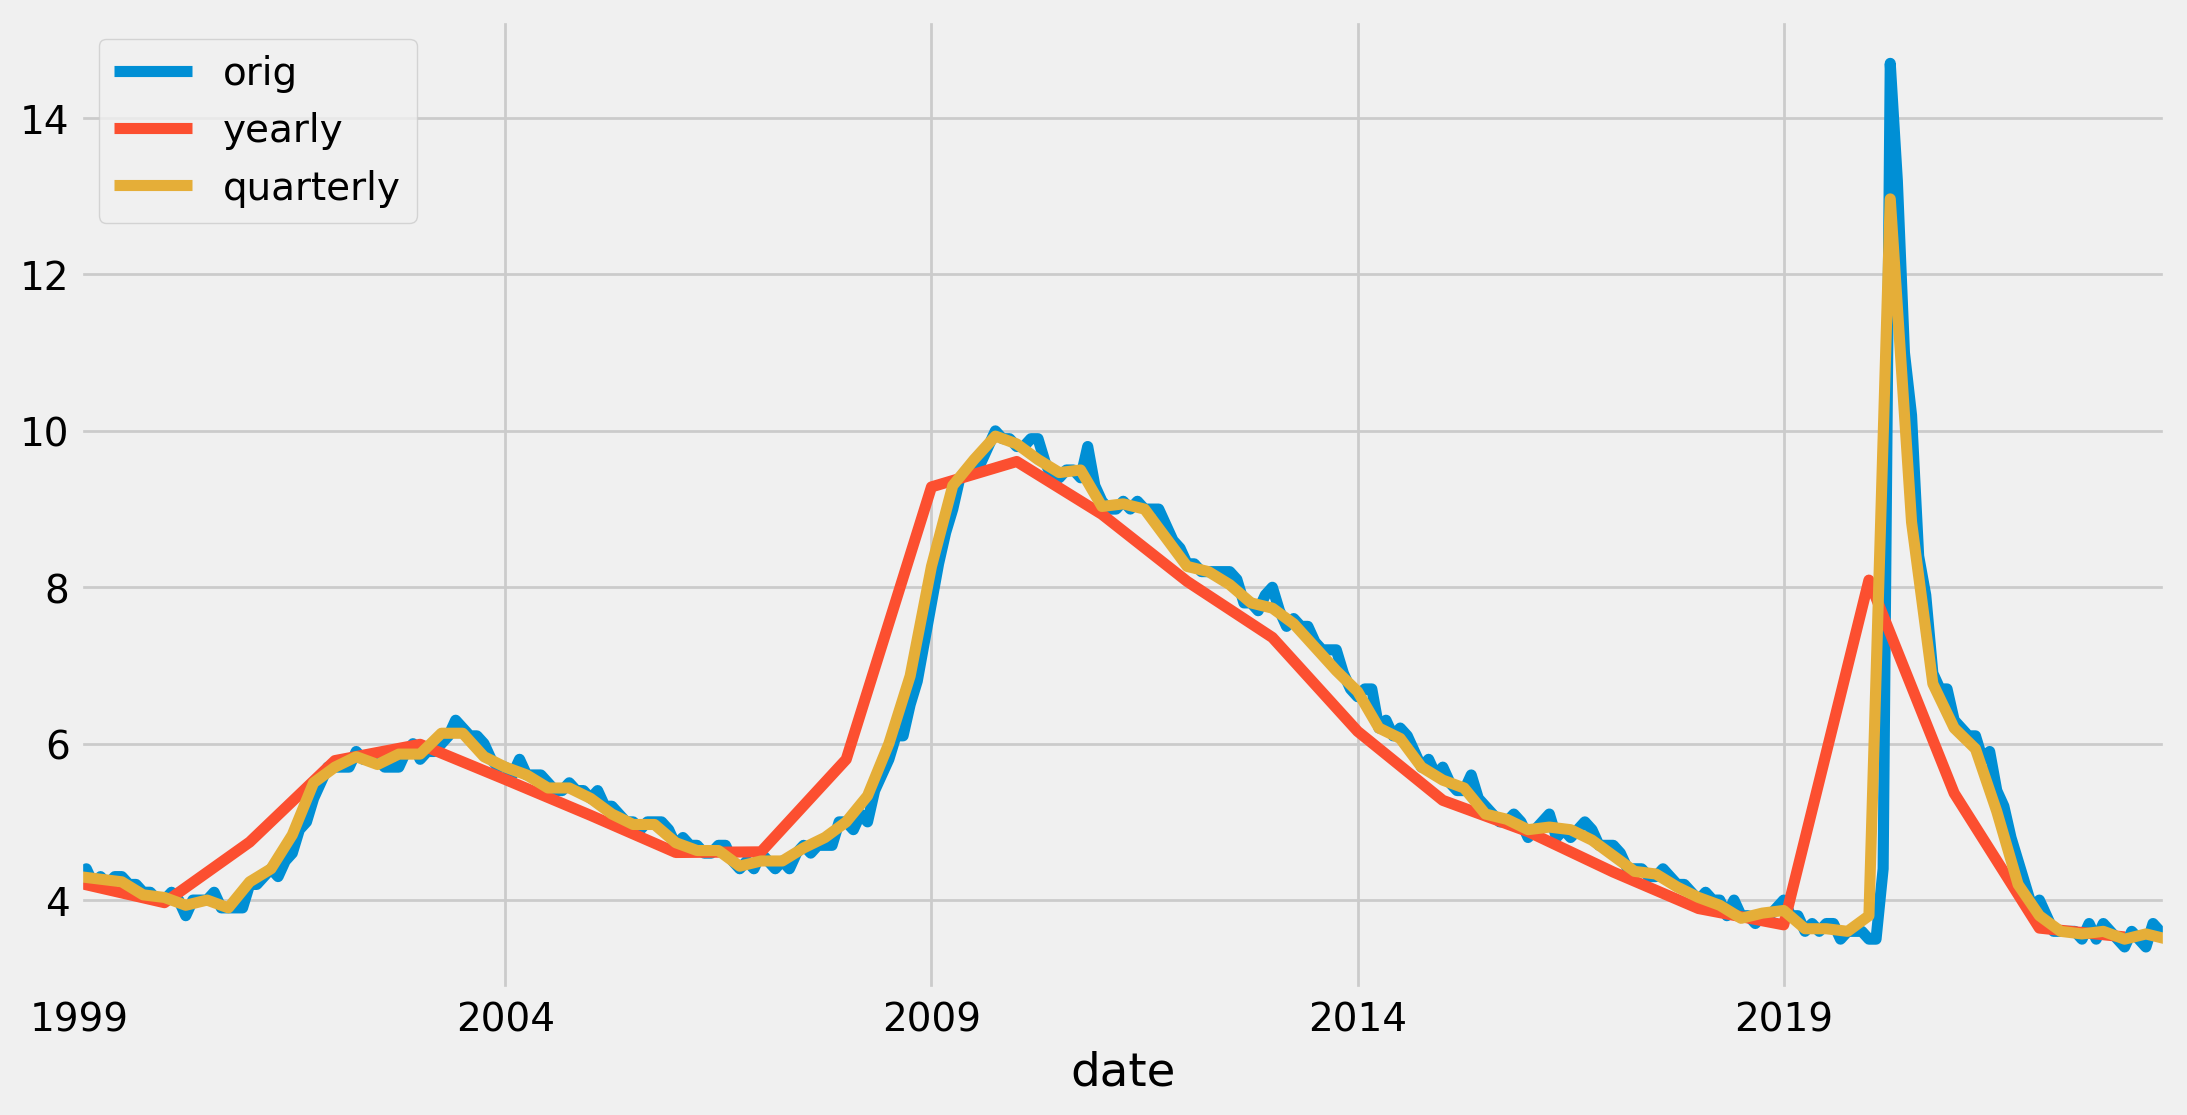

In [24]:
plt.figure(figsize=(12,6))
df.unemployment_rate.plot(label='orig',legend=True)
yearly.plot(label='yearly',legend=True);
quarterly.plot(label='quarterly', legend=True);
# add the quarterly plot 

plt.show()



<a id="rolling-functions"></a>
<a id="rolling-functions"></a>
## "Rolling" Functions
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of functionalities for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` function with a statistical function chained to it. Let's dive into more detail.

<a id="parameters-for-rolling-functions"></a>
<a id="parameters-for-rolling-functions"></a>
### Parameters for `rolling()` Functions

**`rolling().mean()`** (as well as **`rolling().median()`**) can take the following parameters:

- The first indicates the time series to aggregate.
- **`window`** indicates the number of days to include in the average.
- **`center`** indicates whether the window should be centered on the date or use data prior to that date.
- **`freq`** indicates which level to roll the averages up to (as used in **`resample`**): **`D`** for day, **`M`** for month, **`A`** for year, etc.

> **Note:** For more information, see Pandas' [resample documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html#pandas.DataFrame.resample).

To compare the resampled values from the rolling values, let's create some plots.

**Extract the dates from the index as timestamps.**

> *Hint: The `.to_timestamp()` function allows you to extract the timestamps.*

In [41]:
# Get the index from the original series as a timestampdate_ticks_orig.head()
date_ticks_orig = df.index.to_timestamp()
date_ticks_orig

DatetimeIndex(['1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
               '1999-09-01', '1999-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='date', length=295, freq='MS')

In [42]:
# Now get the index from the yearly resampled series as a timestamp.
data_ticks_roll = yearly.index.to_timestamp()
data_ticks_roll

DatetimeIndex(['1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01',
               '2023-01-01'],
              dtype='datetime64[ns]', name='date', freq='AS-JAN')

#### Use matplotlib to plot your time series.

- Choose the time series as y-values and the timestamp-indices extracted in the last part as x-values.
- Plot both, the original timeseries and the one averaged over the windows.

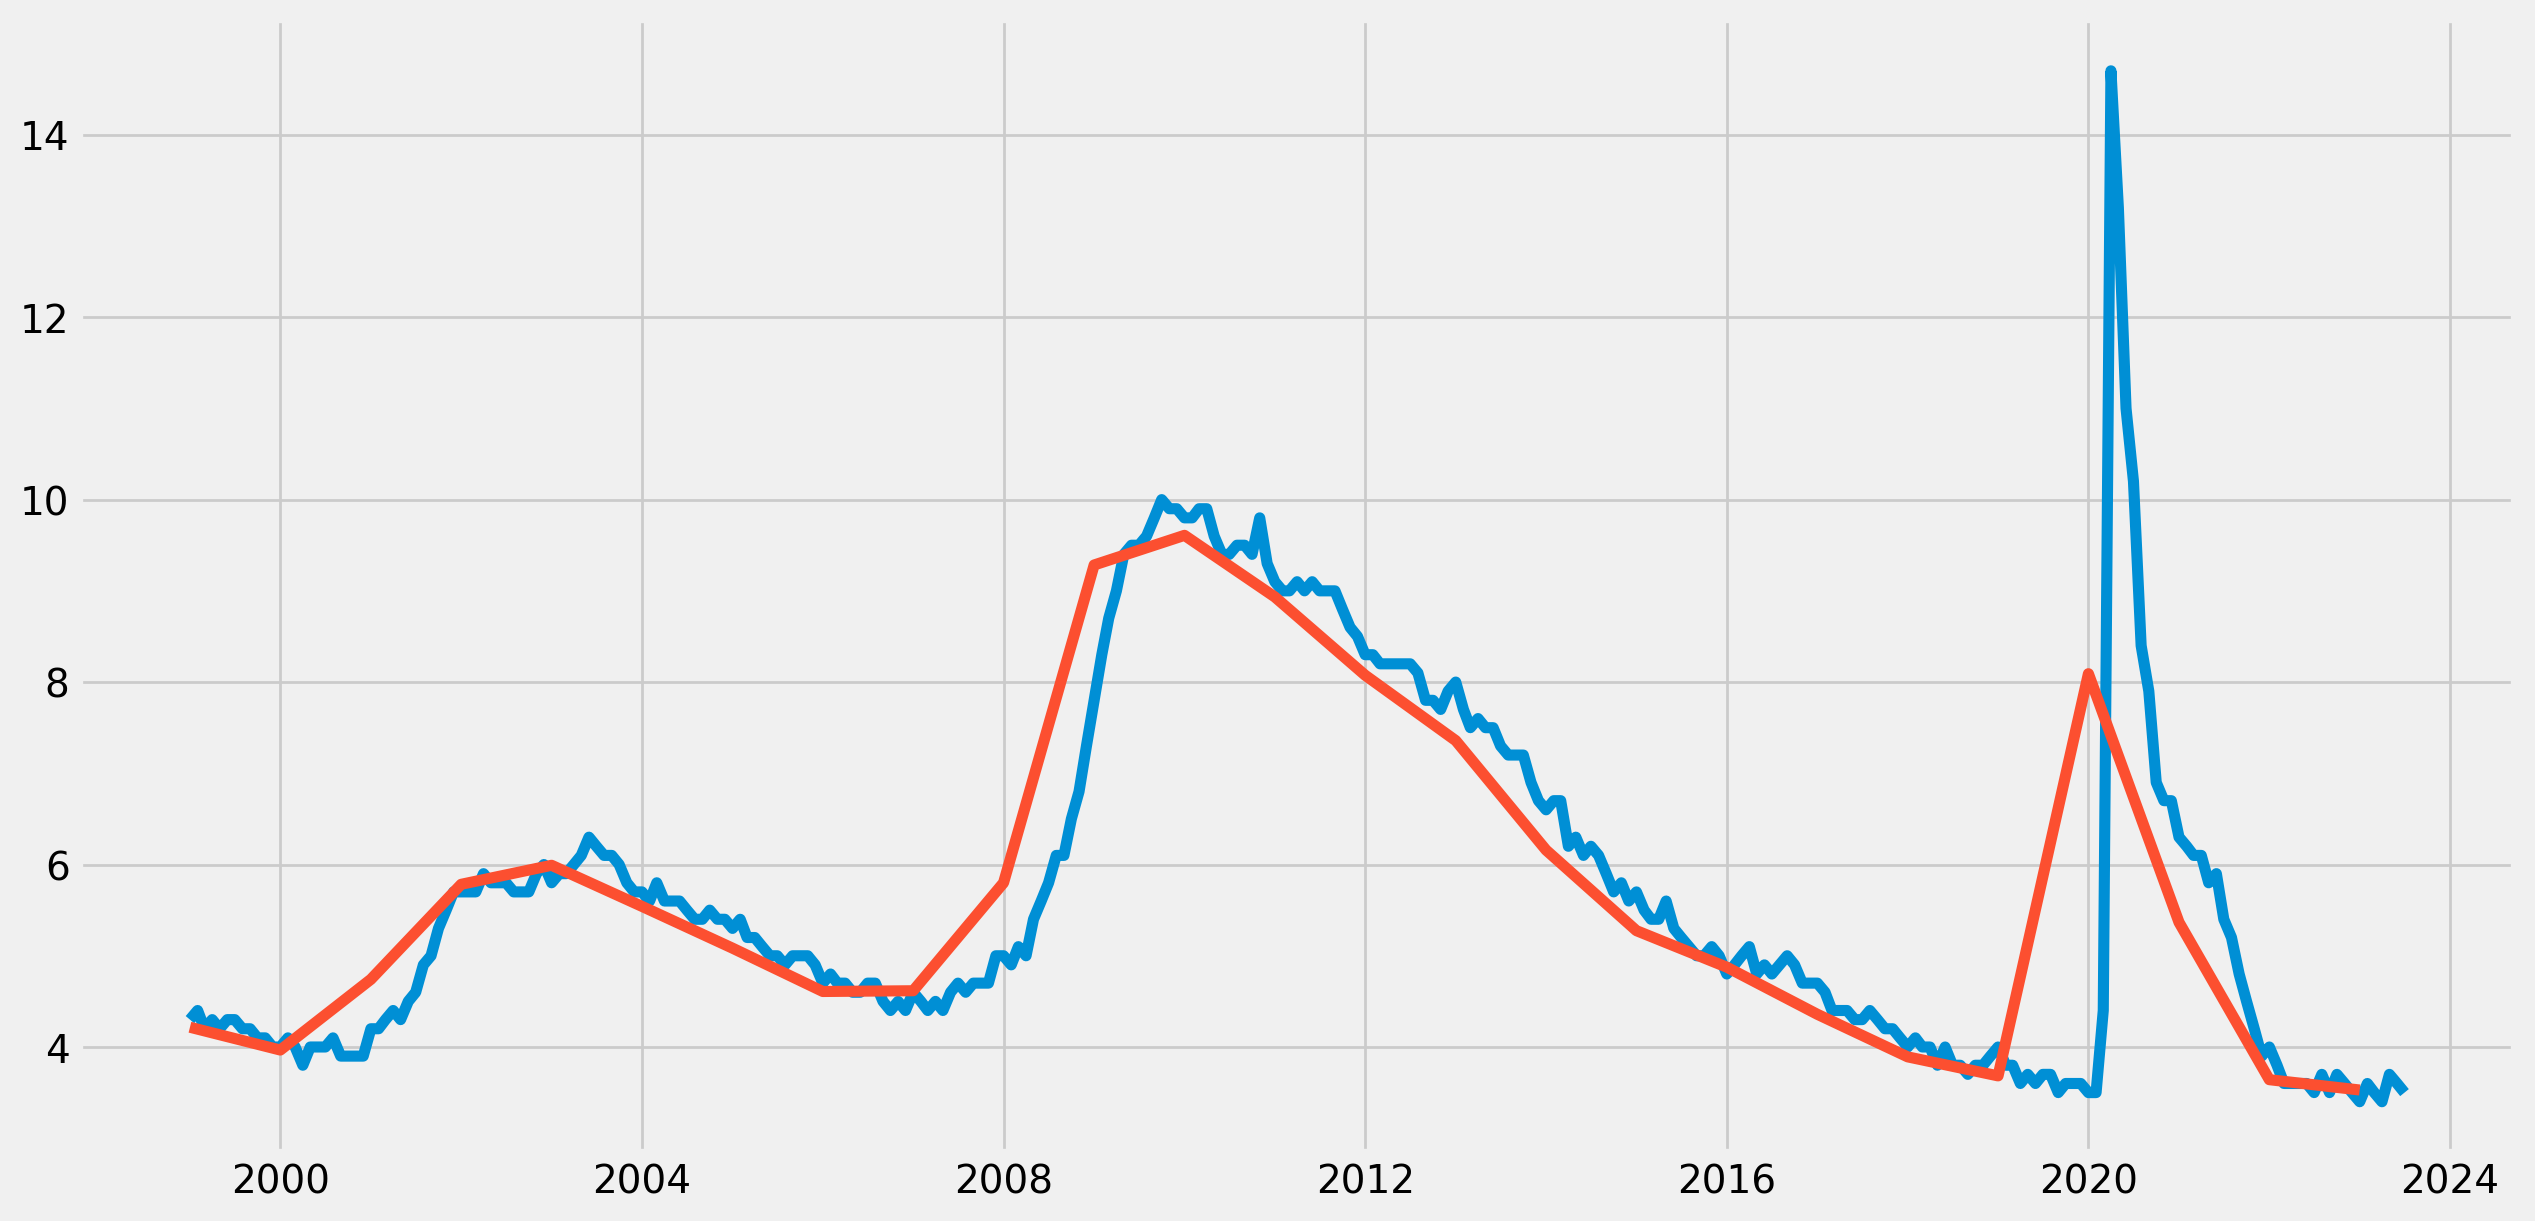

In [55]:
plt.figure(figsize=(14,7))

# plot the original time series with the date_ticks_org as x-values, the unemployment rate as y-values
plt.plot(date_ticks_orig, df.unemployment_rate)

# plot the original yearly series with timestamp index values as x-values, yearly.values as y-values
plt.plot(data_ticks_roll, yearly.values)
plt.tick_params(labelsize=14)

#### Resample annually and calculate the rolling mean of years with `window=3`  without centering.

In [39]:
yearly_3 = yearly.rolling(window=3, center=True).mean()
yearly_3.head()

date
1999         NaN
2000    4.308333
2001    4.830556
2002    5.505556
2003    5.772222
Freq: A-DEC, Name: unemployment_rate, dtype: float64

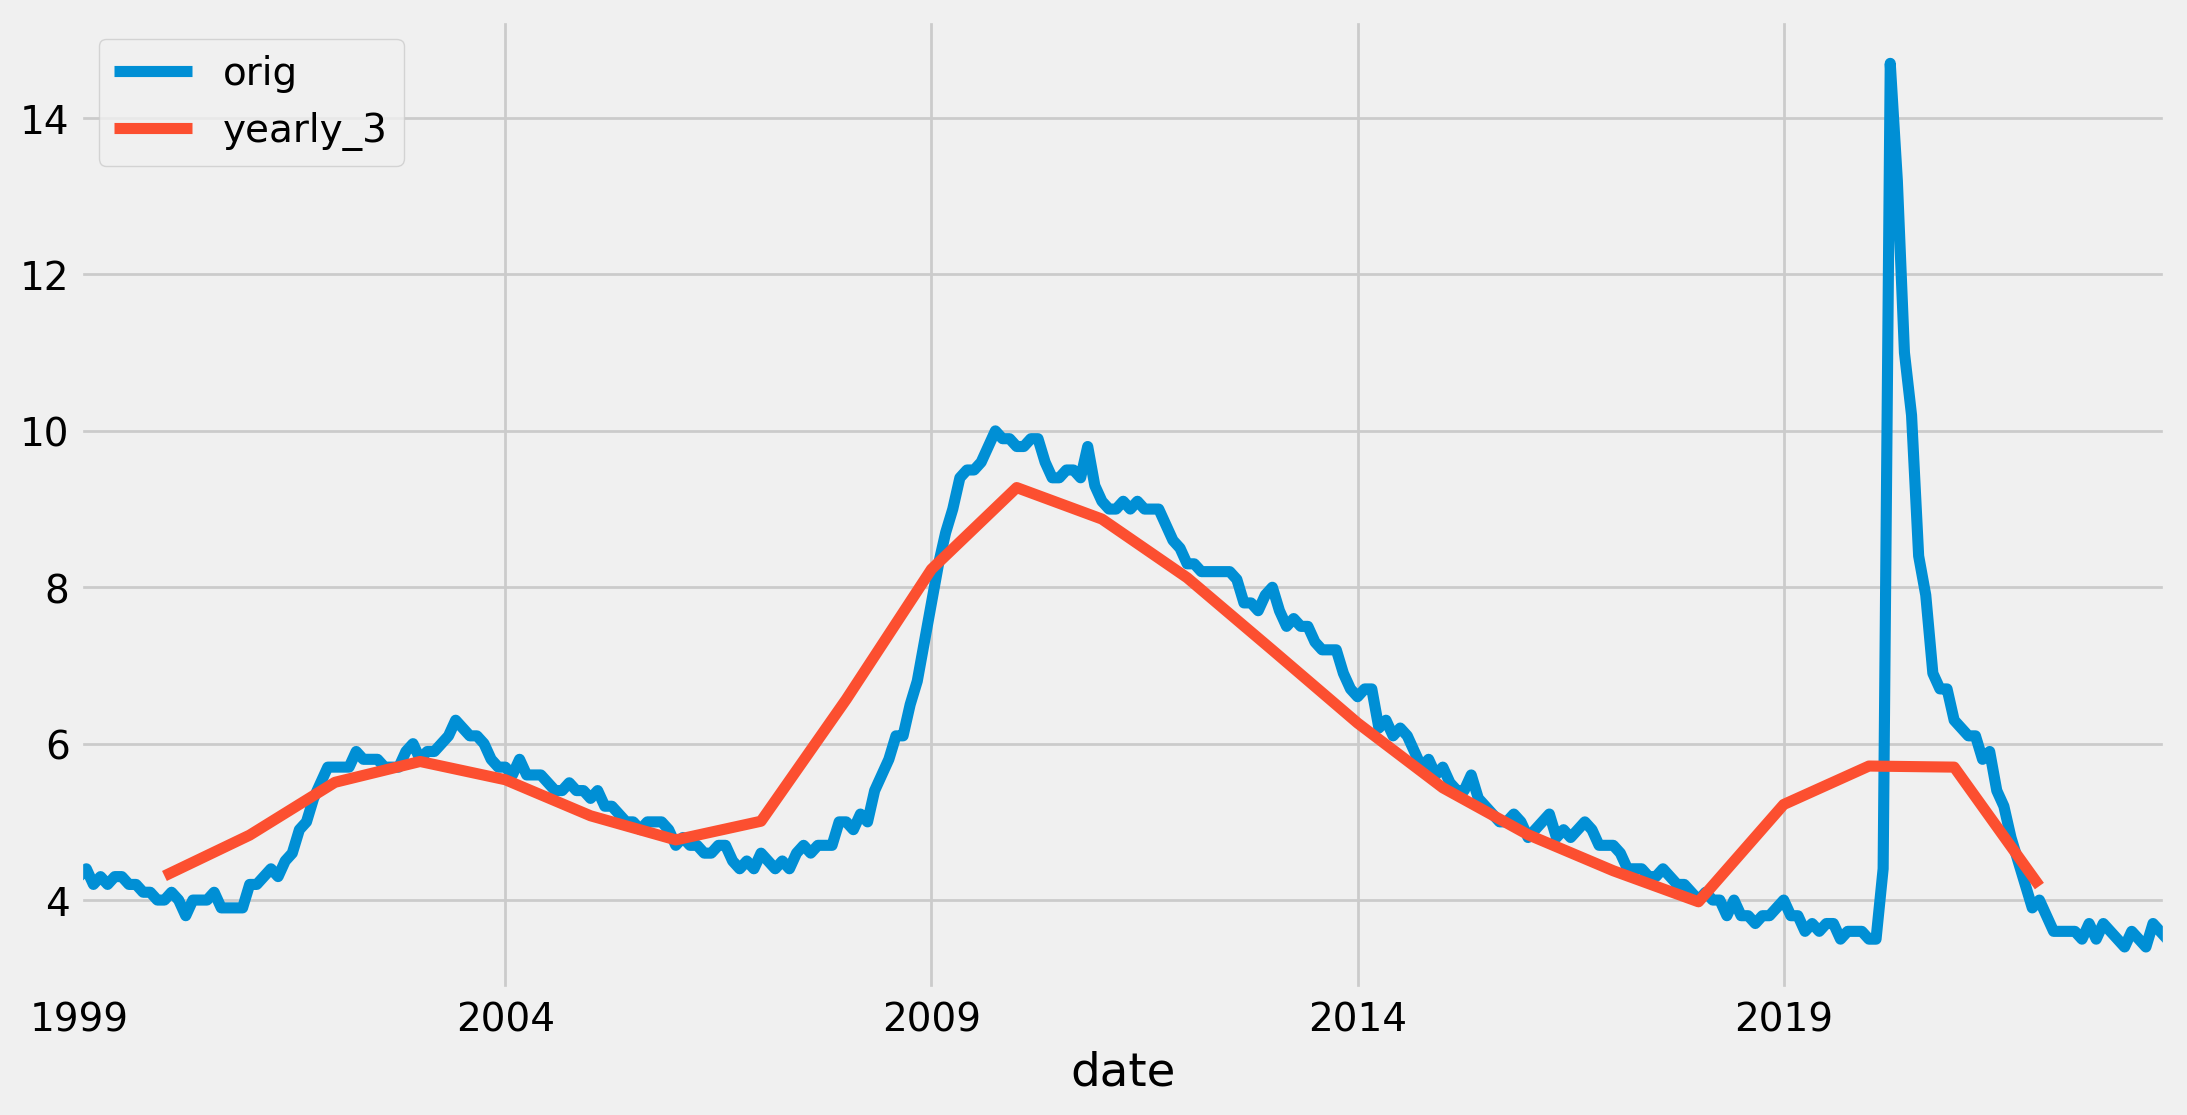

In [40]:
plt.figure(figsize=(12,6))
df.unemployment_rate.plot(label='orig',legend=True)
yearly_3.plot(label='yearly_3',legend=True);

#### Calculate the rolling mean of the original monthly time series with `window=5` and `window=15`. Plot both together.

In [46]:
uroll_w5 = df.unemployment_rate.rolling(window=5).mean()
uroll_w15 = df.unemployment_rate.rolling(window=15).mean()

In [47]:
uroll_w5

date
1999-01     NaN
1999-02     NaN
1999-03     NaN
1999-04     NaN
1999-05    4.28
           ... 
2023-03    3.52
2023-04    3.48
2023-05    3.52
2023-06    3.56
2023-07    3.54
Freq: M, Name: unemployment_rate, Length: 295, dtype: float64

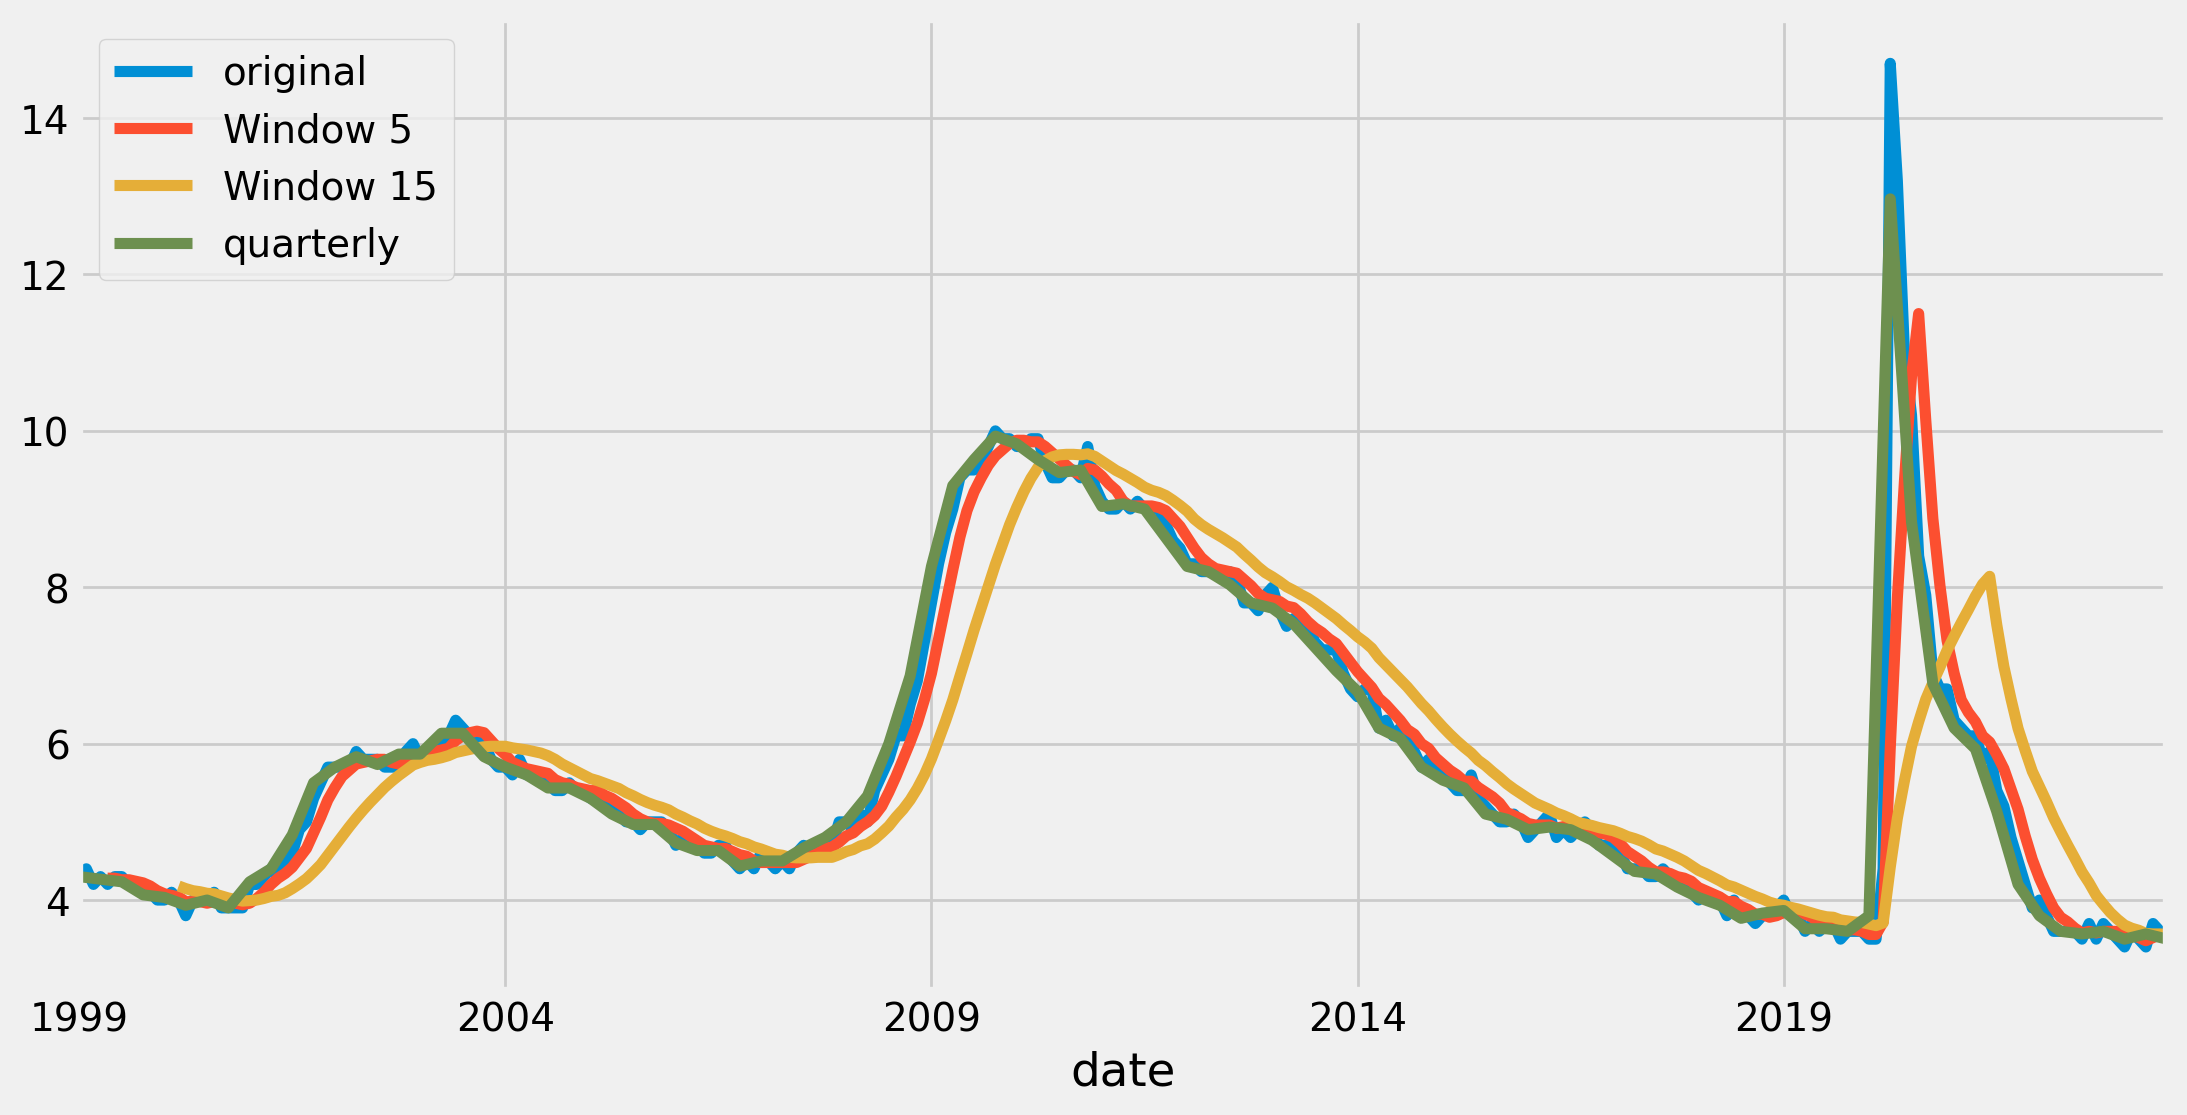

In [53]:
plt.figure(figsize=(12,6))
# plot the original time series
df.unemployment_rate.plot(label='original')
# plot the uroll_w5 and see the difference
uroll_w5.plot(label='Window 5')
# next plot the uroll_w15
uroll_w15.plot(label='Window 15')
# Add the quarterly plot to view the difference
quarterly.plot(label='quarterly')

plt.legend()

## The Expanding Mean
---

The "expanding mean" uses all data points up to the current time to calculate the mean, as opposed to a moving window.

Let's see what this means by considering the unemployment for the year 1999 only.

In [57]:
# Get 12 months of 1999
df_1999 = df.iloc[0:12,]
df_1999

,unemployment_rate
date,
1999-01,4.3
1999-02,4.4
1999-03,4.2
1999-04,4.3
1999-05,4.2
1999-06,4.3
1999-07,4.3
1999-08,4.2
1999-09,4.2


In [58]:
# Resample into Quarters and find the mean for each quarter
quarterly_means_1999 = df_1999.unemployment_rate.resample('Q').mean()
quarterly_means_1999

date
1999Q1    4.300000
1999Q2    4.266667
1999Q3    4.233333
1999Q4    4.066667
Freq: Q-DEC, Name: unemployment_rate, dtype: float64

In [63]:
# Find the mean for Quarter 1, 2 3, 4 each to check how the above values are calculated:
df_1999.iloc[0:3].mean()  # Quarter 1, for example

unemployment_rate    4.3
dtype: float64

### Expanding Mean

The expanding mean, on the other hand, calculates the mean cumulatively up to each time period. You can compare the values by using the first four values of the quarterly_means, and expanding them:

In [64]:
quarterly_means_1999[0:4].expanding().mean()


date
1999Q1    4.300000
1999Q2    4.283333
1999Q3    4.266667
1999Q4    4.216667
Freq: Q-DEC, Name: unemployment_rate, dtype: float64

In [69]:
# Check the result for the expanding mean for 1999Q4
# Expanded mean for Q4 is the mean of each of the means from Q1 up to Q4

quarterly_means_1999[0:4].mean()


4.216666666666667

#### Calculate and plot the expanding mean for the original time series. Resample by quarter.

Use

`df.unemployment_rate.resample('Q').mean().expanding().mean()`.

In [70]:
expanding_mean = df.unemployment_rate.resample('Q').mean().expanding().mean()

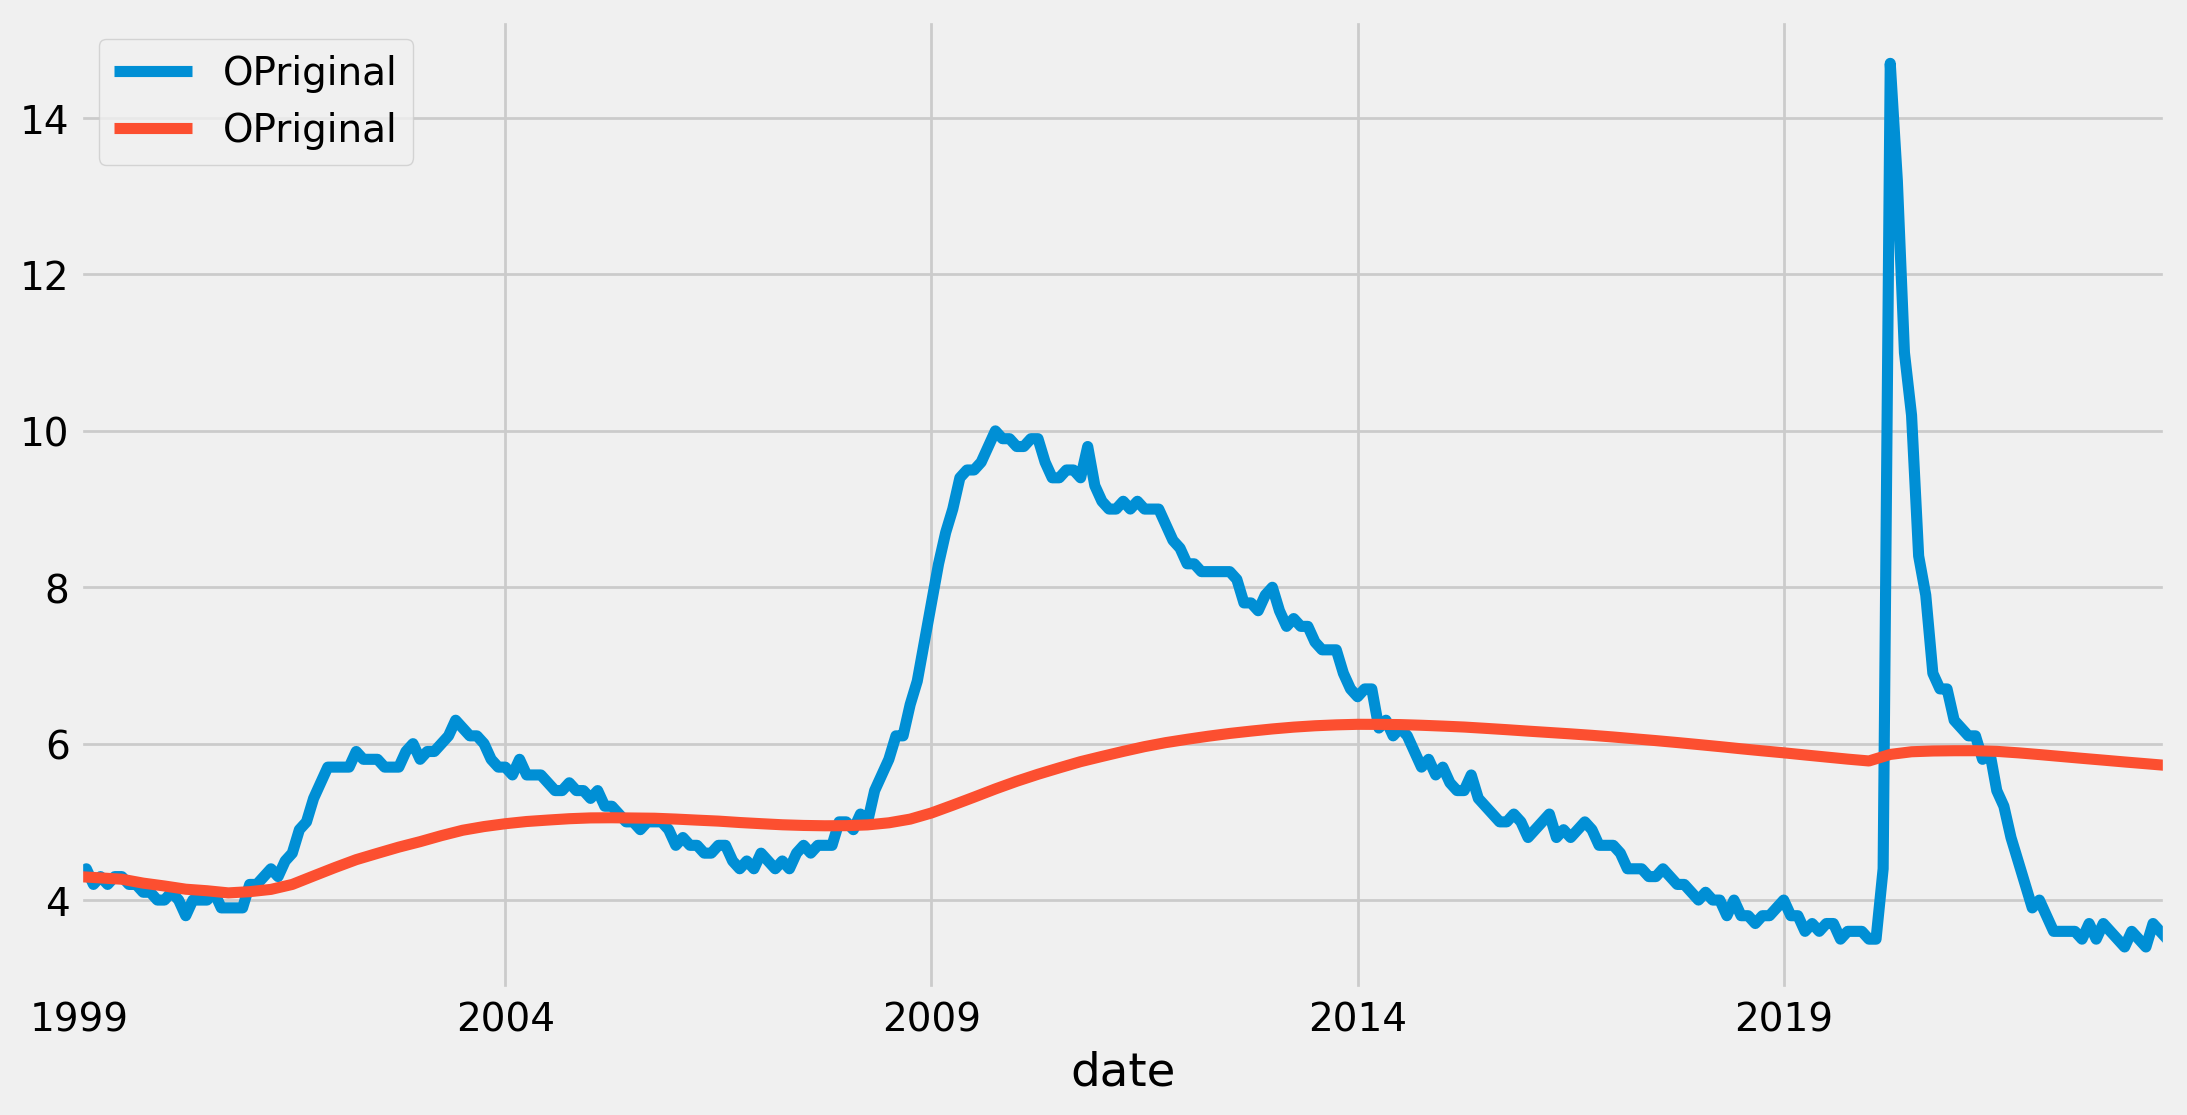

In [78]:
plt.figure(figsize=(12,6))

#plot the original time series
df.unemployment_rate.plot(label='OPriginal')

# plot the expanding mean
expanding_mean.plot(label='OPriginal')


plt.legend()

<a id="exponentially-weighted-windows"></a>
<a id="exponentially-weighted-windows"></a>
## Exponentially Weighted Windows
---

Exponentially weighted windows are one of the most common and effective ways of averaging out noise in time series data. The averaging is done with an "exponential decay" on the contribution of prior means, decreasing the contribution of time points that are further in the past.

The (adjusted) exponentially weighted mean for time $t$, is defined as:

$$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-2} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

> **Note:** Review Pandas' [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html) for more information.

#### Calculate and plot the exponentially weighted sum along with the rolling sum. What is the difference?

For example: `.resample('Q').sum().ewm(span=10).mean()`.

- Find out what `span` does.

In [74]:
exp_weighted_mean = df.unemployment_rate.resample('Q').mean().ewm(span=10).mean()

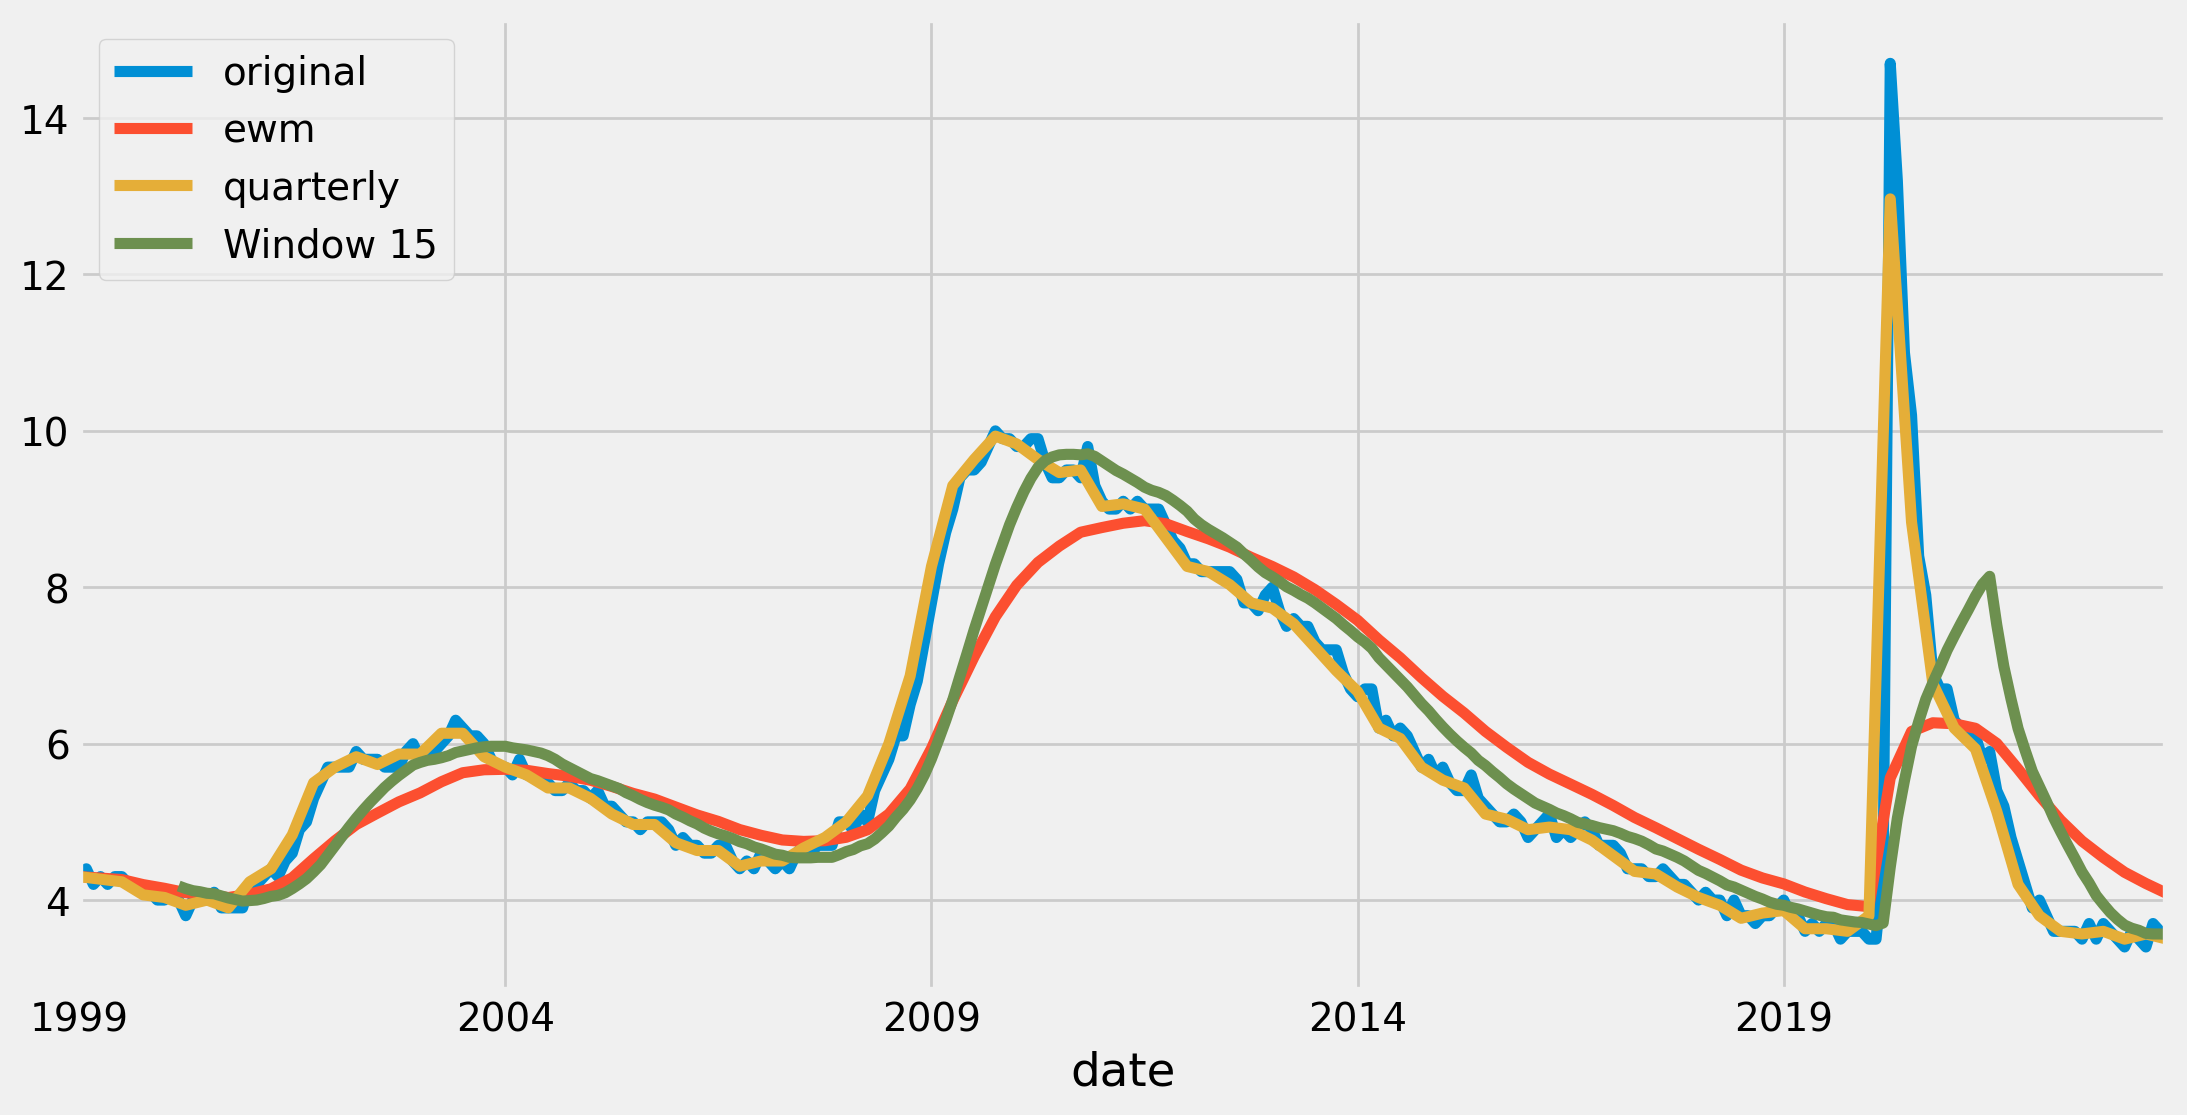

In [80]:
plt.figure(figsize=(12,6))

# plot the original time series
df.unemployment_rate.plot(label='original')

# plot the exponentially weighted mean
exp_weighted_mean.plot(label='ewm')

# compare with the quarterly plot
quarterly.plot(label='quarterly')
uroll_w15.plot(label='Window 15')

plt.legend()

### Use `.diff()` to calculate changes in values from one time period to another

- Why do you get missing values?
- Plot the resulting time series. Compare to the original time series.

In [81]:
df.diff().head(6)

,unemployment_rate
date,
1999-01,NaN
1999-02,0.1
1999-03,-0.2
1999-04,0.1
1999-05,-0.1
1999-06,0.1


In [82]:
df.head(6)

,unemployment_rate
date,
1999-01,4.3
1999-02,4.4
1999-03,4.2
1999-04,4.3
1999-05,4.2
1999-06,4.3


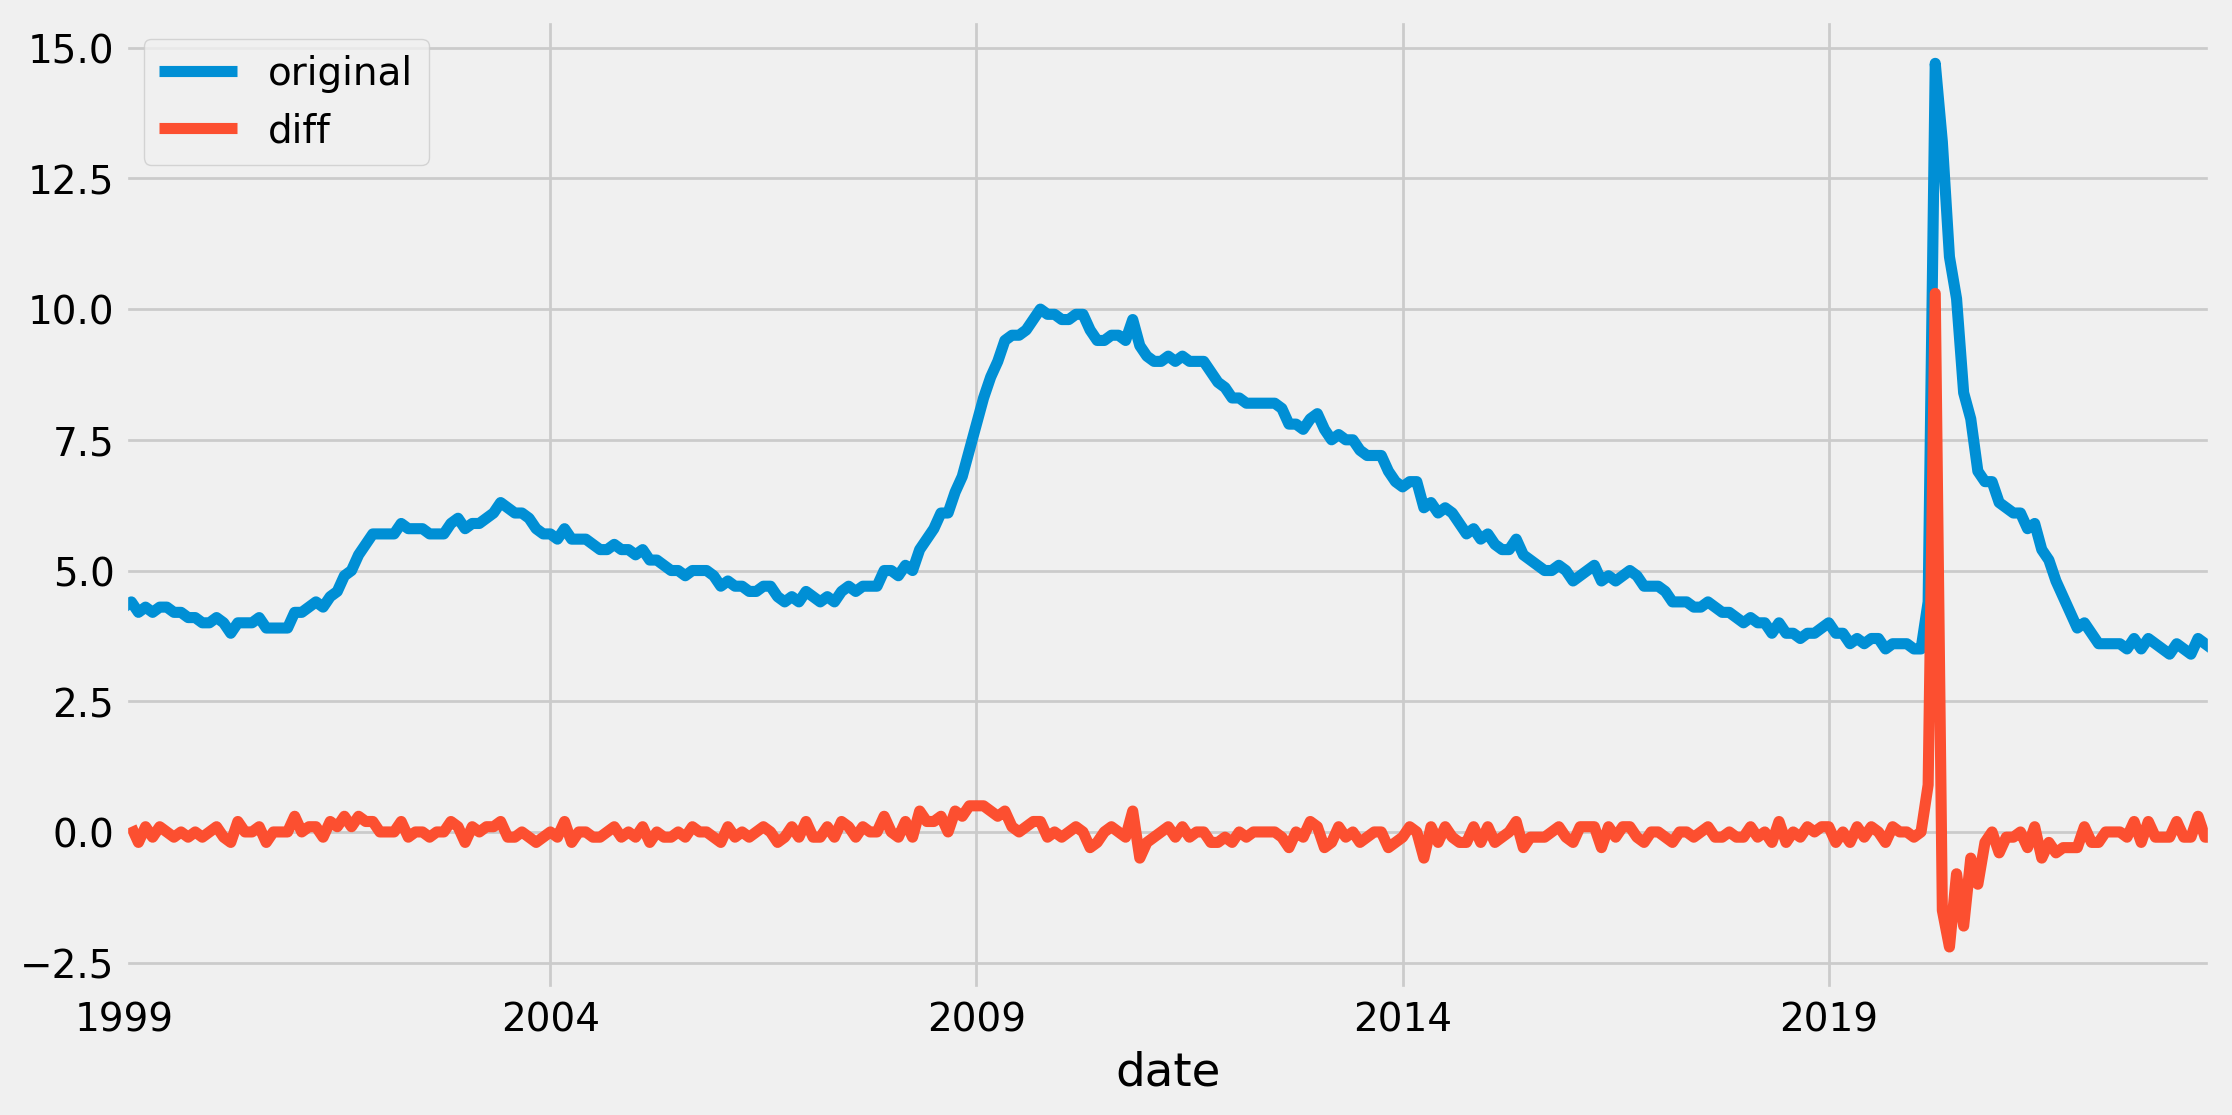

In [85]:
plt.figure(figsize=(12,6))

# plot the unemployment rate
df.unemployment_rate.plot(label='original')
# plot the differenced unemployment rate
df.diff().unemployment_rate.plot(label='diff')
plt.legend()
plt.show()

### What is the difference between applying `.diff(2)` and `.diff().diff()`?

In [86]:
df.diff(2).head()

,unemployment_rate
date,
1999-01,NaN
1999-02,NaN
1999-03,-0.1
1999-04,-0.1
1999-05,0.0


In [87]:
df.head()

,unemployment_rate
date,
1999-01,4.3
1999-02,4.4
1999-03,4.2
1999-04,4.3
1999-05,4.2


In [89]:
df.diff().diff().head()

,unemployment_rate
date,
1999-01,NaN
1999-02,NaN
1999-03,-0.3
1999-04,0.3
1999-05,-0.2


### Use `df.pct_change()` to calculate percent changes from period to period

- Plot the resulting time series. Compare to the original time series.

In [90]:
# check the values after calculating pct_change()
df.pct_change().head()

,unemployment_rate
date,
1999-01,NaN
1999-02,0.023256
1999-03,-0.045455
1999-04,0.023810
1999-05,-0.023256


<Axes: xlabel='date'>

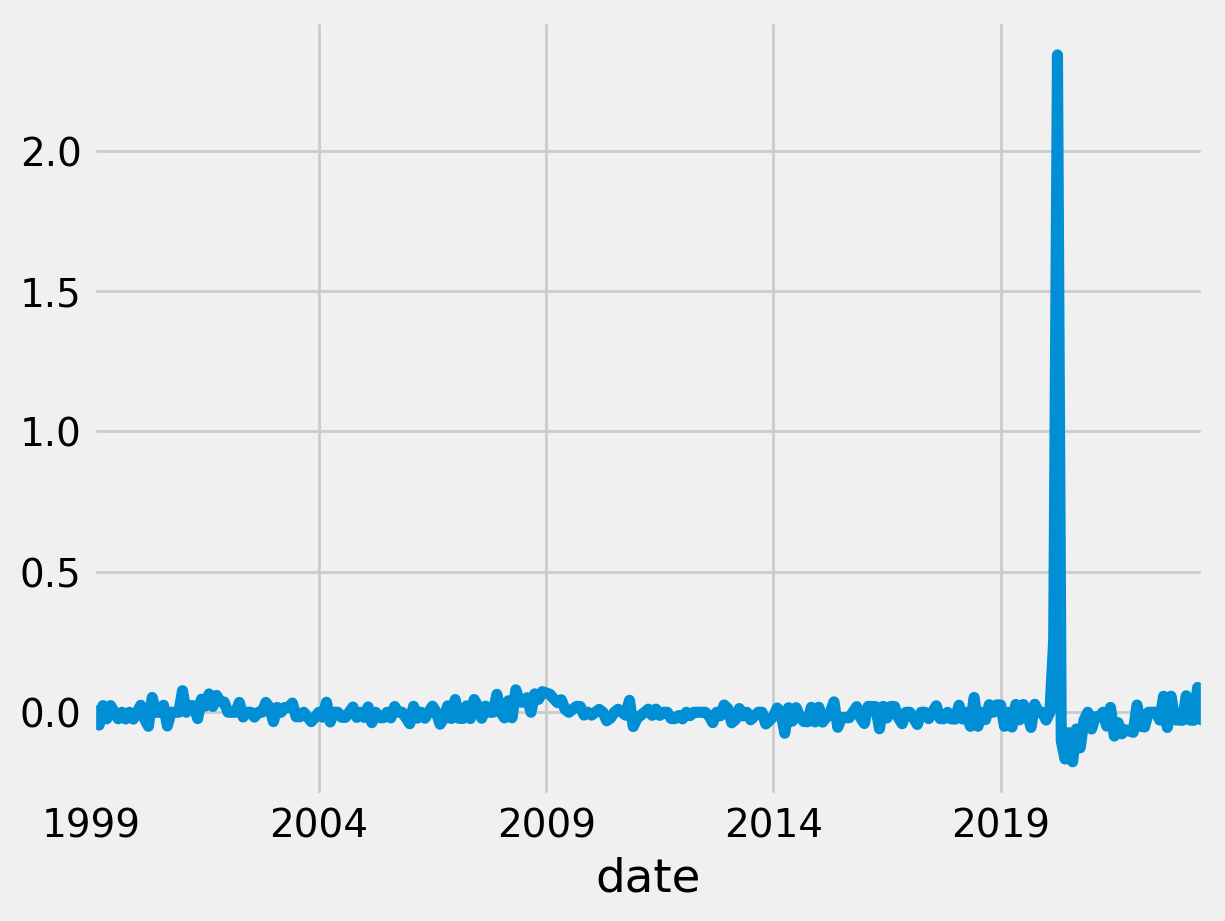

In [91]:
# Plot the pct_change() of the unemployment rate
df.pct_change()['unemployment_rate'].plot()

### Shifting

`df.shift()` is used to bring values from previous dates forward in time.

- How is that different from `.diff()`?

In [92]:
df.shift().head()

,unemployment_rate
date,
1999-01,NaN
1999-02,4.3
1999-03,4.4
1999-04,4.2
1999-05,4.3


In [93]:
df.head()

,unemployment_rate
date,
1999-01,4.3
1999-02,4.4
1999-03,4.2
1999-04,4.3
1999-05,4.2
